In [1]:
#Car 데이터를 가지고, KNN, SVM 으로 분류

In [73]:
#a . 상관도 분석 포함
#b. train_test 분류
#c. 학습 -> 최적의 모델 찾기
#d. 모델 성능 평가

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split #트레인, 테스트 데이터 분류 
from sklearn.svm import SVC #SVC 서포트 벡터 머신 라이브러리(분류화)
from sklearn.metrics import accuracy_score, classification_report  #metrics 는 confusion metrics 의 라이브러리 : accuracy/recall/precision 등 모델 평가
from sklearn.neighbors import KNeighborsClassifier #KNN 분류 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [75]:
car_data = pd.read_csv('car-knn.csv', encoding='UTF-8')

In [76]:
car_data

#wheel
#chassis
#pax
#type
#class

#목표 : 피처를 통해서, vtype 을 찾아내기!

,wheels,chassis,pax,vtype,class
0,1,1,1,Bike,1
1,1,1,1,Bike,1
2,1,1,1,Bike,1
3,1,1,1,Bike,1
4,1,1,1,Bike,1
...,...,...,...,...,...
99995,18,27,1,Truck,4
99996,18,21,1,Truck,4
99997,18,23,1,Truck,4
99998,18,28,1,Truck,4


### 상관도 분석

In [77]:
car_data.corr() #상관도 = 공분산 : 두개의 상관도가 있는것에 따라 그래프를 그림 (상향선이든 하향선이든)

,wheels,chassis,pax,class
wheels,1.000000,0.857299,-0.084669,0.920221
chassis,0.857299,1.000000,0.309328,0.935433
pax,-0.084669,0.309328,1.000000,0.241397
class,0.920221,0.935433,0.241397,1.000000


In [78]:
car_data['vtype'].value_counts() #종류별

Truck    25102
Car      25029
Bus      24975
Bike     24894
Name: vtype, dtype: int64

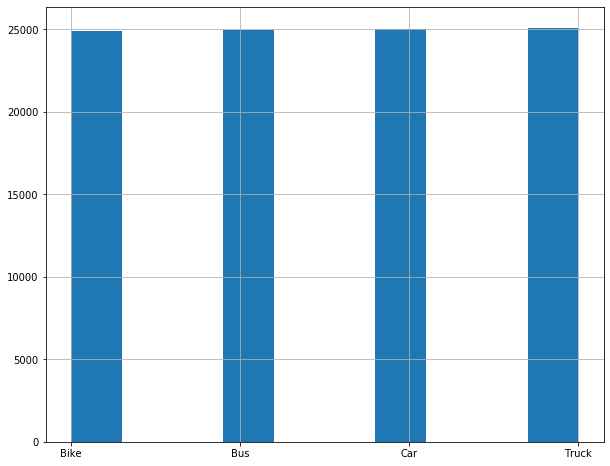

In [79]:
#종류별 그래프
car_data['vtype'].hist(bins=10, figsize=(10,8))

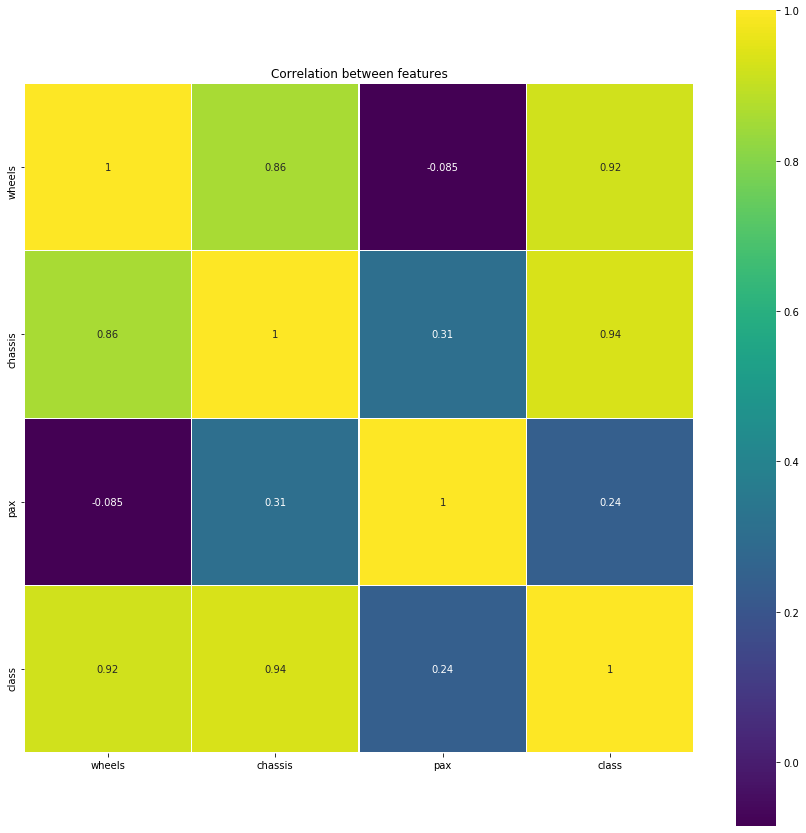

In [80]:
#히트맵 -> 상관도 시각화

plt.figure(figsize=(15, 15))
sns.heatmap(car_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

## chassis와 wheels는 높은 상관, wheels와 class도 높은 상관을 가짐
## 차대가 커지면, 바퀴도 많아짐 -> 트럭의 경우를 생각해보면 됨
## 트럭의 경우 class는 4등급으로 높음. 하여, wheels와 class도 높은 양의 상관을 가짐

In [81]:
y = car_data.loc[:,'vtype'] #정답

In [82]:
y

0         Bike
1         Bike
2         Bike
3         Bike
4         Bike
         ...  
99995    Truck
99996    Truck
99997    Truck
99998    Truck
99999    Truck
Name: vtype, Length: 100000, dtype: object

In [83]:
x = car_data.loc[:,['wheels','chassis', 'pax', 'class']] #피처 = 파라미터

In [84]:
x

,wheels,chassis,pax,class
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
99995,18,27,1,4
99996,18,21,1,4
99997,18,23,1,4
99998,18,28,1,4


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, train_size = 0.8, shuffle = True)
#트레인(머신러닝 학습), 테스트(모델에 입증 데이터), 트레인 검증(머신러닝 학습 정답 데이터), 테스트 검증(모델이 맞춰야 할 데이터)

In [86]:
x_train

,wheels,chassis,pax,class
40128,4,18,30,3
84627,18,26,1,4
96372,18,29,1,4
13008,1,1,1,1
13435,1,1,1,1
...,...,...,...,...
55969,5,4,2,2
44231,6,22,20,3
74890,5,2,4,2
97449,18,22,2,4


In [87]:
y_train

40128      Bus
84627    Truck
96372    Truck
13008     Bike
13435     Bike
         ...  
55969      Car
44231      Bus
74890      Car
97449    Truck
8078      Bike
Name: vtype, Length: 80000, dtype: object

In [88]:
x_test

,wheels,chassis,pax,class
62550,5,1,1,2
39564,4,13,17,3
19179,1,1,1,1
55416,5,4,3,2
94480,18,20,2,4
...,...,...,...,...
87621,18,28,1,4
45134,7,13,19,3
17247,1,1,1,1
91918,18,25,2,4


In [89]:
y_test

62550      Car
39564      Bus
19179     Bike
55416      Car
94480    Truck
         ...  
87621    Truck
45134      Bus
17247     Bike
91918    Truck
28413      Bus
Name: vtype, Length: 20000, dtype: object

In [90]:
#학습기(Estimator) 객체 생성, SVM 서포트 벡터 머신으로 선을 그려 자동차의 타입을 분류함
clf = SVC()
#clf 객체에 x_train(머신러닝 학습 데이터), y_train(머신러닝 정ㄷ바 데이터) 를 학습시킴
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### clf는 현재 머신러닝으로 피처 -> 카종류 정답 데이터 학습함

In [91]:
y_pred = clf.predict(x_test) 
#테스트 데이터 -> 테스트 데이터(x_test) 를 입력하여, y_pred 는 객체안에 자동차의 타입을 예측한 결과를 가지고 있음

In [92]:
y_pred

array(['Car', 'Bus', 'Bike', ..., 'Bike', 'Truck', 'Bus'], dtype=object)

In [93]:
#3. 내 훈련 데이터 정답 = y_test와, 내 훈련(train) 데이터로 학습된 정답(y_pred) 의 정답률 비교
print('정답률= ', accuracy_score(y_test, y_pred)) #y_test = 내가 맞춰야할 답안, y_pred = 훈련 모델로 학습되서 y_test를 넣어 나온 답안 = y_pred

정답률=  1.0


In [94]:
classification_report(y_test, y_pred)

#accuracy : 제대로 예측하였는가
#precision : 정밀도 :  실제데이터 / 실제데이터를 실제데이터로 올바르게 예측하였는가 + 실제데이터를 예측값으로 잘못 예측한 값
#recall : 재현도 : 실제데이터 / 실제데이터를 실제데이터로 올바르게 예측 + 실제데이터를 실제데이터가 아니라고 예측한 값
#f1-score : 위의 값들을 바탕으로, 모델의 예측 및 정답률을 확인함

'              precision    recall  f1-score   support\n\n        Bike       1.00      1.00      1.00      5047\n         Bus       1.00      1.00      1.00      4927\n         Car       1.00      1.00      1.00      5005\n       Truck       1.00      1.00      1.00      5021\n\n    accuracy                           1.00     20000\n   macro avg       1.00      1.00      1.00     20000\nweighted avg       1.00      1.00      1.00     20000\n'

In [95]:
#Knn은 거리계산
knn = KNeighborsClassifier(n_neighbors=5)
#이웃의 수를 홀수로 넣어줘야함.
#KNN 은 그래프 위에서 neighbors 수를 잡아, 가장 가까운 애가 누구인지를 판별함. 


#훈련 데이터 -> 훈련 검증 데이터

knn.fit(x_train, y_train)
#이번엔 Knn으로 학습시킴
#민코프스키 방식으로, 피타고라스 정리를 활용하여 x와 y간의 최적의 거리를 구하는 것
#knn : 결국 학습시킬 애랑 가장 가까운애가 누구인가를 판별


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [96]:
y_pred2 = knn.predict(x_test) 
#테스트 데이터 -> 테스트 데이터(x_test) 를 입력하여, y_pred2 는 객체안에 자동차의 타입을 예측한 결과를 가지고 있음

In [100]:
y_pred2

array(['Car', 'Bus', 'Bike', ..., 'Bike', 'Truck', 'Bus'], dtype=object)

In [101]:
#3. 내 훈련 데이터 정답 = y_test와, 내 훈련(train) 데이터로 학습된 정답(y_pred) 의 정답률 비교
print('정답률= ', accuracy_score(y_test, y_pred2)) #y_test = 내가 맞춰야할 답안, y_pred = 훈련 모델로 학습되서 y_test를 넣어 나온 답안 = y_pred

정답률=  1.0


In [210]:
# 자동차 스펙으로 종류 테스트 / wheels chassis pax class
mini = [1, 5, 7, 10]

test = knn.predict_proba([mini])
#미니_밴 테스트!

In [223]:
label = ['바이크', '차', '버스', '트럭']
count = 0
for a in test:
    for x in a:
        if x == 1.0:
            print(label[count])
        else:
            count += 1
    count = 0
    print('----')

----
----
바이크
----
----


In [225]:
# 대형차 테스트
trucky = [18, 25, 1, 3]

test2 = knn.predict_proba([trucky])
#trucky 로 정확도 테스트

In [226]:
label = ['바이크', '차', '버스', '트럭']
count = 0
for a in test2:
    for x in a:
        if x == 1.0:
            print(label[count])
        else:
            count += 1
    count = 0
    print('----')

트럭
----


In [186]:
knn.predict

<bound method KNeighborsClassifier.predict of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

In [239]:
# 여러 자동차 테스트
test3 = knn.predict_proba([[1,2,3,4],[4,5,6,7],[9,8,7,1]])

In [251]:
label = ['바이크', '차', '버스', '트럭']
print(test3)
# count = 0
for a in test3:
    for x in a:
        if x == 1.0:
            print(label[count])
        else:
            count += 1
    count = 0
    print('----')
    print(count)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
버스
----
0
버스
----
0
차
----
0


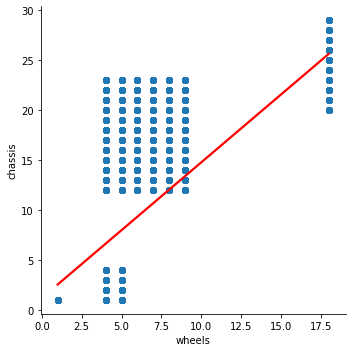

In [252]:
sns.lmplot(x="wheels", y="chassis", data=car_data, line_kws={'color':"red"})

In [254]:
from ipywidgets import interact
def lm_plot(x):
    sns.lmplot(x="wheels",
               y="chassis",
               data=car_data,
               order = x,
               line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"})
    
interact(lm_plot, x=2)

interactive(children=(IntSlider(value=2, description='x', max=6, min=-2), Output()), _dom_classes=('widget-int…

<function __main__.lm_plot(x)>